In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/architasharda/titanic/titanic.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*2xwEsBWICRg-zV_j-jr8dQ.png)

In [3]:
titanic = pd.read_csv("/kaggle/input/d/architasharda/titanic/titanic.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


**> DATA** **> Attributes**

- Name (str): Name of the passenger  
- Pclass (int): Ticket class  
- Sex (str): Sex of the passenger  
- Age (float): Age in years  
- SibSp (int): Number of siblings and spouses aboard  
- Parch (int): Number of parents and children aboard  
- Ticket (str): Ticket number  
- Fare (float): Passenger fare  
- Cabin (str): Cabin number  
- Embarked (str): Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) 

<Figure size 640x480 with 0 Axes>

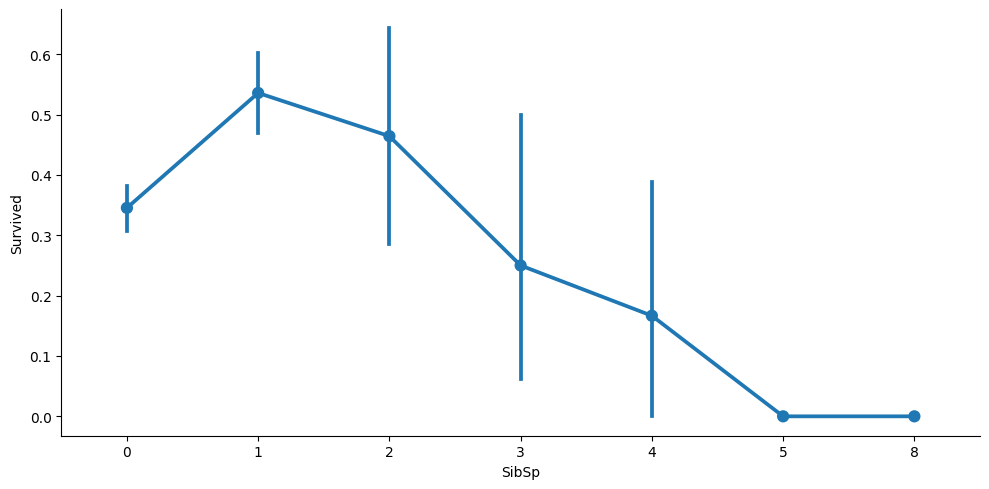

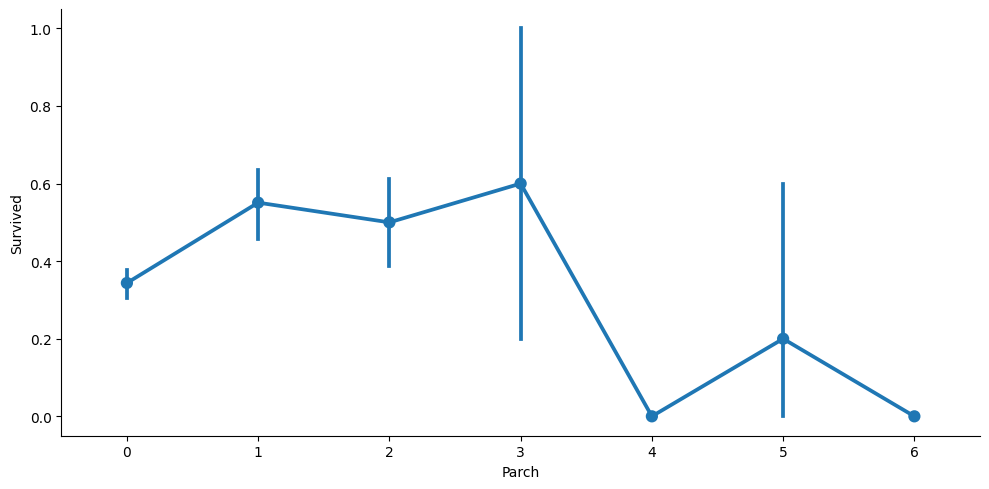

In [7]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x = col, y = 'Survived', data = titanic, kind = 'point', aspect = 2)

* More parents or siblings leads to less survival is seen in the graph.
* Verical bars are error bars.
* Larger the bar - Smaller sample size.

In [8]:
titanic['family_cnt'] = titanic['SibSp'] + titanic['Parch'] 

In [9]:
titanic.drop(['PassengerId','SibSp','Parch'], axis = 1, inplace = True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


**Now Cleaning Categorical features**

In [10]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
family_cnt      0
dtype: int64

In [11]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

***The data shows People with Cabin have higher survival rate.***

The line of code:

```python
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()
```

### What it Does:
This code calculates the mean survival rate (average of the `Survived` column) for passengers grouped by whether their `Cabin` value is missing (`NaN`) or not.

### Explanation of Each Part:
1. **`titanic['Cabin'].isnull()`**:
   - Checks whether the `Cabin` column contains `NaN` (missing) values.
   - Returns a boolean Series where `True` indicates a missing value and `False` indicates a non-missing value.

2. **`titanic.groupby(titanic['Cabin'].isnull())`**:
   - Groups the rows of the DataFrame into two groups:
     - `True`: Passengers without cabin information (`Cabin` is `NaN`).
     - `False`: Passengers with valid cabin information.

3. **`['Survived']`**:
   - Selects the `Survived` column from the DataFrame within each group.
   - The `Survived` column contains binary values (0 or 1), where `1` indicates survival and `0` indicates not surviving.

4. **`.mean()`**:
   - Computes the mean of the `Survived` column for each group.
   - The result represents the survival rate for passengers with and without cabin information.

### Example:
If the data looks like this:

| Cabin     | Survived |
|-----------|----------|
| C85       | 1        |
| NaN       | 0        |
| B28       | 1        |
| NaN       | 0        |
| NaN       | 1        |

- Passengers with `Cabin` data (`False` for `isnull()`):  
  Survival rate = (1 + 1) / 2 = **1.0**  
- Passengers without `Cabin` data (`True` for `isnull()`):  
  Survival rate = (0 + 0 + 1) / 3 = **0.333**  

The output would look like:

```
Cabin
True     0.333
False    1.000
Name: Survived, dtype: float64
```

### Interpretation:
- **True**: Represents the survival rate of passengers without cabin information.  
- **False**: Represents the survival rate of passengers with cabin information.  

This kind of analysis helps to understand whether having cabin information correlates with higher survival rates.

In [12]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(),0,1)

# np.where(titanic['Cabin'].isnull(),0,1) - Checks for NaN Condition in Cabin

titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1,0


In [13]:
titanic.drop(['Cabin'],axis =1, inplace = True)

In [14]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0


In [15]:
Gender = {'male' : 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(Gender)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,S,0,0


In [16]:
titanic.drop(['Ticket', 'Name',	'Embarked'],axis =1, inplace = True)

In [17]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [18]:
titanic.to_csv("/kaggle/working/titanic_cleaned.csv")

**Train and Split**

In [19]:
from sklearn.model_selection import train_test_split

![](https://images.shiksha.com/mediadata/ugcDocuments/images/wordpressImages/2022_12_MicrosoftTeams-image-6.jpg)

In [20]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [21]:
features = titanic.drop('Survived',axis = 1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state= 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state= 42)


* X_train, X_test -> Features
* y_train, y_test -> labels
* Test - > 40%


In [22]:
for dataset in (y_train,y_val, y_test):
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


***Logistic Regression***

Regression is a statistical process for estimating the relationships among variables. This is often used to make a prediction about some outcome. 

Linear Regression:-
> y = mx + b

Logistic Regression - For binary Classification models

![Formula](https://miro.medium.com/v2/resize:fit:1400/1*MMpmPO29QQ6rZte9lFoCjg.png)

In [23]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()

In [24]:
dir(LogisticRegression)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'sparsify']

In [25]:
import joblib
# pickle the best model that we get and save it out
# so that then we can read it back.
from sklearn.model_selection import GridSearchCV

# Helps us check hyperparameters and fine tune our system.

import warnings

warnings.filterwarnings('ignore', category= FutureWarning)
warnings.filterwarnings('ignore', category= DeprecationWarning)

tr_features = X_train
tr_labels = y_train

In [26]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))



* 'mean_test_score': Mean accuracy for each set of hyperparameters.
* 'std_test_score': Standard deviation of accuracy for each set of hyperparameters.
* 'params': The hyperparameter combinations tested.


In [27]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5) # cv -> Cross Validation

# Fit the model on training features and labels
cv.fit(tr_features, tr_labels.values.ravel())

# Print results of the Grid Search
print_results(cv)

BEST PARAMS: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**K Fold Cross Validation**

![K fold Cross Validation](https://www.sharpsightlabs.com/wp-content/uploads/2024/02/cross-validation-explained_FEATURED-IMAGE.png)

In [28]:
cv.best_estimator_

LogisticRegression(C=1)

**Confusion Matrix**
* A confusion matrix is a two-dimensional matrix used in classification experiments to evaluate the performance of a system by showing the number of correctly and wrongly classified data.
![](https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c42677529a0f4e97e4f43_644bedb136edb30fc02b0753_classification_metrics_img_source_grey.001-min.png)

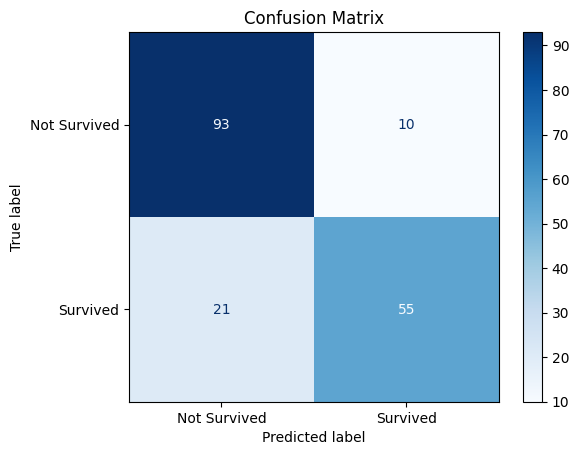

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_predictions(y_actual, y_predicted):
   
    cm = confusion_matrix(y_actual, y_predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.show()

# Predictions
y_pred = cv.predict(X_test)

# Plot actual vs predicted
plot_predictions(y_test, y_pred)

**Write Pickled Model**

In [30]:
joblib.dump(cv.best_estimator_,"/kaggle/working/LR_model.pkl")

['/kaggle/working/LR_model.pkl']

**Support Vector Machine**


* SVMs are very efficient in high dimensional spaces and generally are used in classification problems.
* The main goal of SVMs is to divide the datasets into number of classes in order to find a maximum marginal hyperplane (MMH) 

![](https://miro.medium.com/v2/resize:fit:600/format:webp/0*9jEWNXTAao7phK-5.png)
![](https://miro.medium.com/v2/resize:fit:600/format:webp/0*0o8xIA4k3gXUDCFU.png)

In [31]:
from sklearn.svm import SVC

SVC()

SVC()

In [32]:
svc = SVC()

parameters = {
    'kernel' : ['linear', 'rbf'],
    'C' : [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5) # cv -> Cross Validation

# Fit the model on training features and labels
cv.fit(tr_features, tr_labels.values.ravel())  # ravel -> converts vector to array

# Print results of the Grid Search
print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [33]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

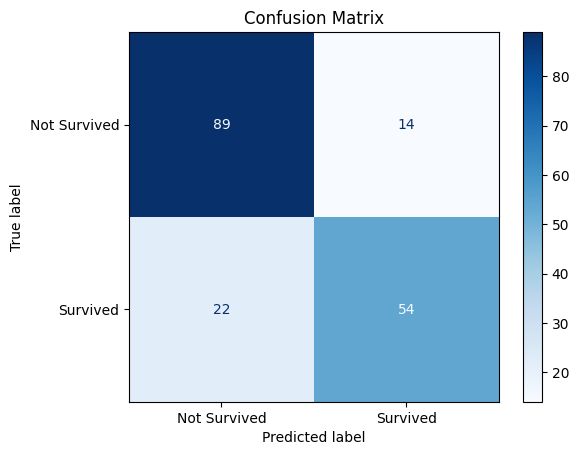

In [34]:
# Predictions
y_pred = cv.predict(X_test)

# Plot actual vs predicted
plot_predictions(y_test, y_pred)

In [35]:
joblib.dump(cv.best_estimator_,"/kaggle/working/SVM_model.pkl")

['/kaggle/working/SVM_model.pkl']

**Multi Layer Perceptron**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpIFjBZRj80RVDUeecTQY2Jub_aMm88M3O3Aq5V3qW_ww0tjK9a1PIVzyvBRWwWBsxWtQ&usqp=CAU)


In [36]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
print(MLPRegressor())
print(MLPClassifier())

MLPRegressor()
MLPClassifier()


In [37]:
dir(MLPClassifier)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_parameter_constraints',
 '_predict',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_score',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_input',
 '_validate_params',
 'fit',
 'get_

In [38]:
mlp = MLPClassifier()

parameters = {
    'hidden_layer_sizes' : [(10,),(50,),(100,)],
    'activation' : ['relu','tanh','logistic'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5) # cv -> Cross Validation

# Fit the model on training features and labels
cv.fit(tr_features, tr_labels.values.ravel())  # ravel -> converts vector to array

# Print results of the Grid Search
print_results(cv)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}

0.719 (+/-0.07) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.684 (+/-0.077) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.736 (+/-0.079) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.796 (+/-0.142) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.783 (+/-0.098) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.787 (+/-0.103) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.792 (+/-0.111) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.809 (+/-0.094) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.805 (+/-0.095) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'lear

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


![](https://www.researchgate.net/profile/Karen-Loaiza/publication/344331692/figure/fig8/AS:965939822616576@1607309408063/Artificial-neural-network-activation-functions-In-this-figure-the-most-common.ppm)
![](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

In [39]:
cv.best_estimator_

MLPClassifier(learning_rate='invscaling')

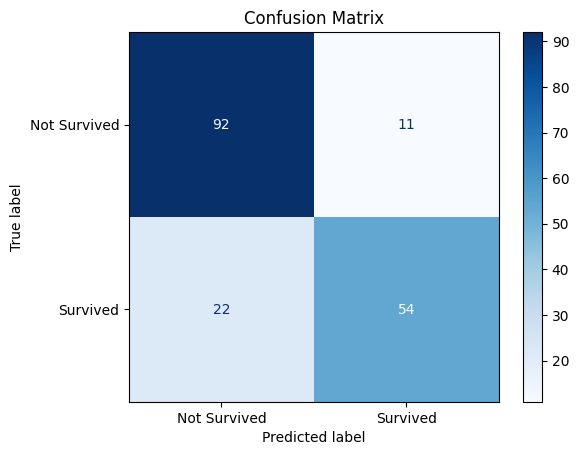

In [40]:
# Predictions
y_pred = cv.predict(X_test)

# Plot actual vs predicted
plot_predictions(y_test, y_pred)

In [41]:
joblib.dump(cv.best_estimator_,"/kaggle/working/MLP_model.pkl")

['/kaggle/working/MLP_model.pkl']

**Random Forest**
![](https://miro.medium.com/v2/resize:fit:1010/1*R3oJiyaQwyLUyLZL-scDpw.png)

In [42]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [43]:
print(RandomForestClassifier)
RandomForestRegressor

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


sklearn.ensemble._forest.RandomForestRegressor

In [44]:
rf = RandomForestClassifier()

parameters = {
    'n_estimators' : [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5) 
cv.fit(tr_features, tr_labels.values.ravel())  # ravel -> converts vector to array

# Print results of the Grid Search
print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}

0.807 (+/-0.12) for {'max_depth': 2, 'n_estimators': 5}
0.805 (+/-0.103) for {'max_depth': 2, 'n_estimators': 50}
0.809 (+/-0.097) for {'max_depth': 2, 'n_estimators': 250}
0.798 (+/-0.114) for {'max_depth': 4, 'n_estimators': 5}
0.82 (+/-0.123) for {'max_depth': 4, 'n_estimators': 50}
0.822 (+/-0.116) for {'max_depth': 4, 'n_estimators': 250}
0.818 (+/-0.026) for {'max_depth': 8, 'n_estimators': 5}
0.815 (+/-0.066) for {'max_depth': 8, 'n_estimators': 50}
0.815 (+/-0.067) for {'max_depth': 8, 'n_estimators': 250}
0.79 (+/-0.037) for {'max_depth': 16, 'n_estimators': 5}
0.803 (+/-0.039) for {'max_depth': 16, 'n_estimators': 50}
0.809 (+/-0.034) for {'max_depth': 16, 'n_estimators': 250}
0.766 (+/-0.123) for {'max_depth': 32, 'n_estimators': 5}
0.8 (+/-0.023) for {'max_depth': 32, 'n_estimators': 50}
0.813 (+/-0.036) for {'max_depth': 32, 'n_estimators': 250}
0.787 (+/-0.041) for {'max_depth': None, 'n_estimators': 5}
0.811 (+/-0.031) 

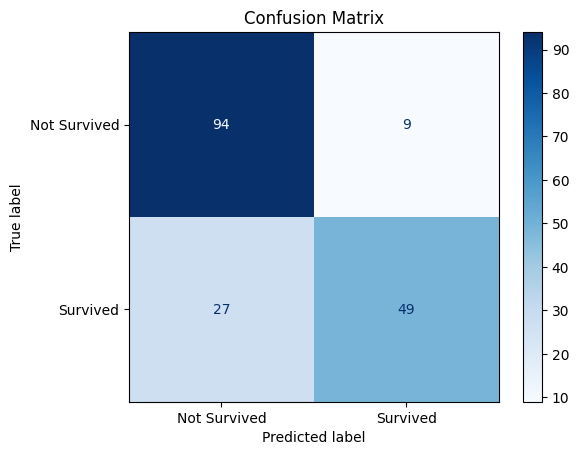

In [45]:
# Predictions
y_pred = cv.predict(X_test)

# Plot actual vs predicted
plot_predictions(y_test, y_pred)

In [46]:
joblib.dump(cv.best_estimator_,"/kaggle/working/RF_model.pkl")

['/kaggle/working/RF_model.pkl']

**Boosting**
![](https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [48]:
print(GradientBoostingClassifier)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


In [49]:
print(GradientBoostingRegressor)

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


In [50]:
gb = GradientBoostingClassifier()

parameters = {
    'n_estimators' : [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9], #Shallow trees
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5) 
cv.fit(tr_features, tr_labels.values.ravel())  # ravel -> converts vector to array

# Print results of the Grid Search
print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.841 (+/-0.077) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.822 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.818 (+/-0.043) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.826 (+/-0.047) for {'learning_r

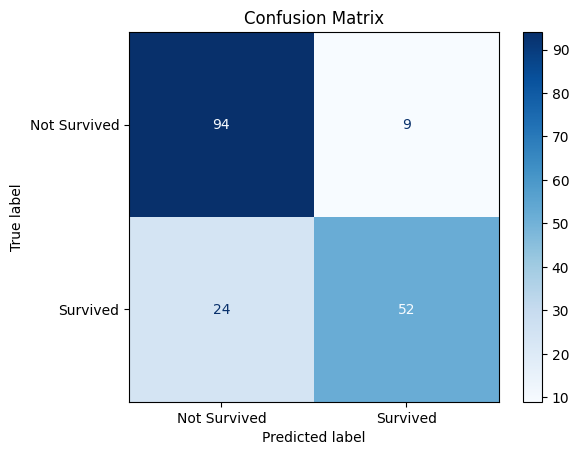

In [51]:
# Predictions
y_pred = cv.predict(X_test)

# Plot actual vs predicted
plot_predictions(y_test, y_pred)

In [52]:
joblib.dump(cv.best_estimator_,"/kaggle/working/GB_model.pkl")

['/kaggle/working/GB_model.pkl']

***Comparision Between Algorithms***

In [53]:
from sklearn.metrics import recall_score, accuracy_score, precision_score

In [54]:
val_features = X_val
val_labels = y_val

te_features = X_test
te_labels = y_test

In [55]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load("/kaggle/working/{}_model.pkl".format(mdl))
    print("/kaggle/working/{}_model.pkl".format(mdl))

/kaggle/working/LR_model.pkl
/kaggle/working/SVM_model.pkl
/kaggle/working/MLP_model.pkl
/kaggle/working/RF_model.pkl
/kaggle/working/GB_model.pkl


In [56]:
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=0.1, kernel='linear'),
 'MLP': MLPClassifier(learning_rate='invscaling'),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=250),
 'GB': GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)}

In [57]:
from time import time

def evaluate_model(name, model, features, labels):
   
    # Start timing
    start = time()
    # Make predictions
    pred = model.predict(features)
    # End timing
    end = time()
    
    # Calculate metrics
    accuracy = round(accuracy_score(labels, pred), 3) *100
    precision = round(precision_score(labels, pred), 3) *100
    recall = round(recall_score(labels, pred), 3)*100
    
    # Print results
    print('{} -- Accuracy: {}% / Precision: {}% / Recall: {}% / Latency: {}ms'.format(
        name,
        accuracy,
        precision,
        recall,
        round((end - start) * 1000, 1)
    ))




In [58]:
for name,mdl in models.items():
    evaluate_model(name,mdl,val_features, val_labels)

LR -- Accuracy: 77.5% / Precision: 71.2% / Recall: 64.60000000000001% / Latency: 1.9ms
SVM -- Accuracy: 74.7% / Precision: 67.2% / Recall: 60.0% / Latency: 2.6ms
MLP -- Accuracy: 77.5% / Precision: 70.5% / Recall: 66.2% / Latency: 1.6ms
RF -- Accuracy: 82.0% / Precision: 82.39999999999999% / Recall: 64.60000000000001% / Latency: 36.2ms
GB -- Accuracy: 81.5% / Precision: 80.80000000000001% / Recall: 64.60000000000001% / Latency: 6.0ms


In [59]:
evaluate_model("Gradient Boost", models['GB'], te_features, te_labels)

Gradient Boost -- Accuracy: 81.6% / Precision: 85.2% / Recall: 68.4% / Latency: 3.6ms
